In [14]:
# Setup & imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
df=pd.read_csv("/content/sensex.csv")

In [3]:
df

,Price,Close,High,Low,Open,Volume
0,Date,NaN,NaN,NaN,NaN,NaN
1,1997-07-01,4300.859863,4301.770020,4247.660156,4263.109863,0.0
2,1997-07-02,4333.899902,4395.310059,4295.399902,4302.959961,0.0
3,1997-07-03,4323.459961,4393.290039,4299.970215,4335.790039,0.0
4,1997-07-04,4323.819824,4347.589844,4300.580078,4332.700195,0.0
...,...,...,...,...,...,...
6831,2025-03-24,77984.382812,78107.226562,77179.351562,77456.273438,10100.0
6832,2025-03-25,78017.187500,78741.687500,77745.632812,78296.281250,12700.0
6833,2025-03-26,77288.500000,78167.867188,77194.218750,78021.453125,10500.0
6834,2025-03-27,77606.429688,77747.460938,77082.507812,77087.390625,12700.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6836 entries, 0 to 6835
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   6836 non-null   object 
 1   Close   6835 non-null   float64
 2   High    6835 non-null   float64
 3   Low     6835 non-null   float64
 4   Open    6835 non-null   float64
 5   Volume  6835 non-null   float64
dtypes: float64(5), object(1)
memory usage: 320.6+ KB


In [6]:
df.shape

(6836, 6)

In [7]:
df.describe()

,Close,High,Low,Open,Volume
count,6835.000000,6835.000000,6835.000000,6835.000000,6.835000e+03
mean,23689.331480,23841.440412,23539.508101,23710.572978,5.953719e+04
std,20513.834825,20606.700419,20417.999236,20526.578017,9.059152e+05
min,2600.120117,2682.590088,2594.870117,2621.889893,0.000000e+00
25%,5613.715088,5685.430176,5557.225098,5633.314941,6.200000e+03
50%,17919.300781,18040.169922,17786.130859,17920.980469,1.140000e+04
75%,33779.134766,33953.144531,33577.779297,33779.806641,1.820000e+04
max,85836.117188,85978.250000,85474.578125,85893.843750,3.181510e+07


In [13]:
# Basic preprocessing
# Drop non-numeric columns or convert if necessary
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Optionally reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Fit Gaussian Mixture Model
n_components = 3  # choose number of clusters/components
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X_scaled)

GaussianMixture(n_components=3, random_state=42)

In [18]:
df = df.dropna().reset_index(drop=True)

In [20]:
# Predict cluster labels & probabilities
labels = gmm.predict(X_scaled)
probs = gmm.predict_proba(X_scaled)
df['GMM_Label'] = labels
df['Max_Prob'] = probs.max(axis=1)

print("Cluster counts:\n", df['GMM_Label'].value_counts())

Cluster counts:
 GMM_Label
2    4478
1    2231
0     126
Name: count, dtype: int64


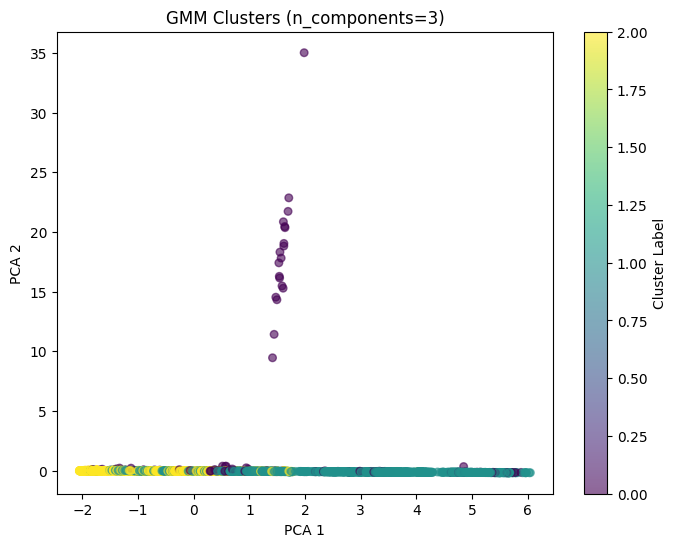

In [21]:
# Visualise clusters in PCA space
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=30, alpha=0.6)
plt.title(f"GMM Clusters (n_components={n_components})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster Label')
plt.show()

In [23]:
# Evaluate / inspect components
print("Means of GMM components:\n", gmm.means_)
print("Covariances of GMM components:\n", gmm.covariances_)
print("AIC:", gmm.aic(X_scaled), "BIC:", gmm.bic(X_scaled))

Means of GMM components:
 [[ 0.86811437  0.88407399  0.84942048  0.86812698  2.67060685]
 [ 0.8939281   0.8955718   0.89234839  0.89440551 -0.04841471]
 [-0.49470511 -0.49603869 -0.49332441 -0.49495601 -0.05341865]]
Covariances of GMM components:
 [[[ 1.19604702e+00  1.19876213e+00  1.19129373e+00  1.19221960e+00
   -7.31904321e-01]
  [ 1.19876213e+00  1.20242771e+00  1.19420775e+00  1.19608165e+00
   -7.76948674e-01]
  [ 1.19129373e+00  1.19420775e+00  1.18768099e+00  1.18846030e+00
   -6.78345770e-01]
  [ 1.19221960e+00  1.19608165e+00  1.18846030e+00  1.19060261e+00
   -7.31608843e-01]
  [-7.31904321e-01 -7.76948674e-01 -6.78345770e-01 -7.31608843e-01
    4.53817339e+01]]

 [[ 1.09616123e+00  1.09298929e+00  1.09914646e+00  1.09539174e+00
   -6.04350941e-03]
  [ 1.09298929e+00  1.08995990e+00  1.09602800e+00  1.09240015e+00
   -6.02013728e-03]
  [ 1.09914646e+00  1.09602800e+00  1.10224356e+00  1.09850939e+00
   -6.06952340e-03]
  [ 1.09539174e+00  1.09240015e+00  1.09850939e+00  1.

In [25]:
# Save results
df.to_csv("gmm_clustered_output.csv", index=False)

from google.colab import files
files.download("gmm_clustered_output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>